##  Indexing & SQLite 

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

### Count Genre

Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.
Note: Ignore the empty value present in genre.
Output Format:

genre_1 num_movie_1

genre_2 num_movie_2

In [1]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
val=cur.execute('select genre,count(*) from genre group by genre')

df=pd.DataFrame(val)
df=df[df[0]!='']

for i in range(df.shape[0]):
    print(df.iloc[i][0],df.iloc[i][1])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


### IMDB Movie 

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.
Output Format:

rating


In [2]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()

data=cur.execute('select earning.movie_id,IMDB.rating,earning.domestic,earning.worldwide from IMDB inner join earning on IMDB.movie_id=earning.movie_id')
df=pd.DataFrame(data)
df['earning']=df[2]+df[3]
df=df[df.earning==df.earning.describe().max()]
print(df.iloc[0][1])

8.1


### IMDB Voted

Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.
Output Format:

movie_name rating


In [3]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
var=cur.execute('select title, rating,max(totalvotes) from imdb ')

for j in var:
    print(j[0],j[1])

Inception (2010) 8.8


### IMDB running time

Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.
Note: Don't print 'min' in running time.
Output Format:

movie_name running_time


In [4]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
curvar=cur.execute('select title, runtime from imdb ')

# convert into a dataframe
df=pd.DataFrame(curvar)
#assign headings
df.columns=['title','runtime']
#split runtime and take [0] value from expanded array and convert to float and update runtime column
df['runtime']=df.runtime.str.split(expand=True)[0].astype(float)  

#first get an array of index of max value of each column and 
#then this index is fed to df.loc to get the max value of each column

value=df.loc[df['runtime'].idxmax()]
print(value[0],int(value[1]))

The Wolf of Wall Street (2013) 180


### IMDB profit 

Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
Output Format:

movie_name


In [7]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=cur.execute('select imdb.title,imdb.budget,earning.domestic,earning.worldwide from imdb inner join earning on imdb.movie_id=earning.movie_id')
df=pd.DataFrame(data)
df.columns=['title','budget','rdomestic','rworldwide']
df=df[df.budget!='']


df['profit']=df['rdomestic']+df['rworldwide']-df['budget']

df=df[df.profit==df.profit.max()]
print(df.iloc[0][0])

Star Wars: The Force Awakens (2015)


### IMDB least budget

Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
Output Format:

movie_name


In [1]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=cur.execute('select imdb.title,imdb.budget,earning.domestic,earning.worldwide from imdb inner join earning on imdb.movie_id=earning.movie_id')
df=pd.DataFrame(data)
df.columns=['title','budget','rdomestic','rworldwide']
df=df[df.budget!='']                                        # filter empty values
df.sort_values('budget',ascending=False,inplace=True)       # sort values in descending order to get last few entries
df=df.tail(2)                                               # get last two entry of same least budget                                   
df['profit']=df['rdomestic']+df['rworldwide']-df['budget']  # get profit values
df=df[df.profit==df.profit.max()]                           # find max profit entry 
print(df.iloc[0][0])


Short Term 12 (2013)


###  IMDB Year Top 

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.
Output Format:

year_1 name_movie_1

year_2 name_movie_2

year_3 name_movie_3

In [2]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=cur.execute('select imdb.title,earning.domestic,earning.worldwide from imdb inner join earning on imdb.movie_id=earning.movie_id')
df=pd.DataFrame(data)
df.columns=['title','domestic','worldwide']

# split title and take 2nd value and strip ')' from year string
df['year']=df.title.str.split('(',expand=True)[1].str.strip(')')   
df['grossing']=df['domestic']+df['worldwide']
# handle one anamolous entry in year
df['year'].replace('The Unexpected Virtue of Ignorance','2014',inplace=True)
# sort by grossing
df.sort_values('grossing',ascending=False,inplace=True)
# use group by function and get first entry from each group, first entry will be max due to ascending order.
df_1=df.groupby('year',as_index=False).first()
for i in range(7):
    print(df_1['year'][i],df_1['title'][i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


### IMDB genre budget

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
Output Format:

genre_1 percent_1

genre_2 percent_2

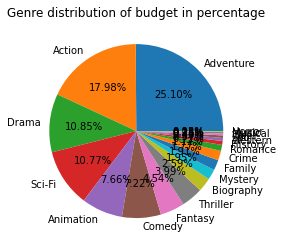

Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=cur.execute('select genre.genre,IMDB.budget from genre inner join IMDB on genre.movie_id=IMDB.movie_id')
df=pd.DataFrame(data)
df.columns=['genre','budget']

# replace null value of budget by 0
df['budget'].replace('',0, inplace=True)
# filter empty genre entries
df=df[df['genre']!='']
# group by genre and summing up budget using sum ()
df=df.groupby(by='genre',as_index=False).sum()

# sort values by budget, ignore for submission
df.sort_values(by='budget',ascending=False,ignore_index=True,inplace=True)

plt.pie(df['budget'],labels=df['genre'],autopct='%0.2f%%')
plt.title('Genre distribution of budget in percentage')
plt.show()

# "{:.2f}".format((df.budget[i]*100)/(df['budget'].sum())) is used for percetage calculation.

for i in  range (20):
     print(df.genre[i],"{:.2f}".format((df.budget[i]*100)/(df['budget'].sum())))

### IMDB genre earning

Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.
Output Format:

genre_1 percent_1

genre_2 percent_2

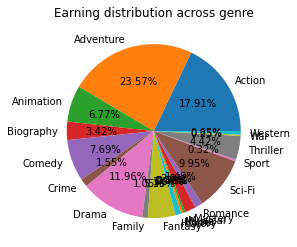

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [5]:
# code is very similar to previous example

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()
data=cur.execute('select genre.genre,earning.domestic,earning.worldwide from genre inner join earning on genre.movie_id=earning.movie_id')
df=pd.DataFrame(data)
df.columns=['genre','domestic','worldwide']
df['earning']=df['domestic']+df['worldwide']

df=df[df['genre']!='']
df=df.groupby(by='genre',as_index=False).sum()

#df.sort_values(by='earning',ascending=False,ignore_index=True,inplace=True)

plt.pie(df['earning'],labels=df['genre'],autopct='%0.2f%%')
plt.title('Earning distribution across genre')
plt.show()


for i in  range (20):
     print(df.genre[i],"{:.2f}".format((df.earning[i]*100)/(df['earning'].sum())))

### IMDB Specific Genre

Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.
Output Format:

movie_name



In [6]:
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')
cur=db.cursor()

# use of left outer join query to get the desired data
data=cur.execute("select genre.genre,imdb.title,imdb.rating from genre left join imdb on genre.movie_id=imdb.movie_id and imdb.rating >= 8 and (genre.genre='Sci-Fi' or genre.genre='Mystery')" )
df=pd.DataFrame(data)
df.columns=['genre','title','rating']
df=df[df['rating']>=8.0]   #Filter
arr=df.title.value_counts()  # unique count of title in descending order in an array
print(arr.index[0])        # index of first count is printed as it had two genre 

Arrival (2016)


### This coding was done by @RK2021